<a href="https://colab.research.google.com/github/OmerrYildirim/HuaweiProject/blob/main/Huawei_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import shutil
import os
import kagglehub

src_path = kagglehub.dataset_download("mohammedjaveed/loveda-dataset")
dst_path = "/content/loveda-dataset"

# Kopyala (veya taşı)
if not os.path.exists(dst_path):
    shutil.copytree(src_path, dst_path)




In [2]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os

class LoveDADataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None, mask_transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.mask_transform = mask_transform
        self.image_filenames = sorted(os.listdir(image_dir))  # ensure matching order
        self.mask_filenames = sorted(os.listdir(mask_dir))

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_filenames[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_filenames[idx])

        image = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path)  # do not convert to RGB

        if self.transform:
            image = self.transform(image)
        if self.mask_transform:
            mask = self.mask_transform(mask)

        mask = mask.squeeze(0)
        mask = mask.long()


        mask[mask == 7] = 0  # Geçersiz sınıfı düzelt


        return image, mask


In [3]:
import torchvision.transforms as T

image_transform = T.Compose([
    T.Resize((256, 256)),  # Resmi 256x256 yapar (yükseklik, genişlik)
    T.ToTensor(),          # Tensor'a çevirir ve normalize eder [0,1]
])

mask_transform = T.Compose([
    T.Resize((256, 256), interpolation=T.InterpolationMode.NEAREST),  # Maskeyi de resize et (etiket bozulmasın diye nearest)
    T.PILToTensor(),  # Tensor'a çevirir (normalize etmez)
])



| Tür                  | Açıklama                                           | Avantajları                                | Dezavantajları                                | Kullanım Alanları                 |
| -------------------- | -------------------------------------------------- | ------------------------------------------ | --------------------------------------------- | --------------------------------- |
| **Nearest Neighbor** | En yakın pikselin değerini aynen alır.             | Çok hızlı, sınıf maskeleri için ideal.     | Kenarlar keskin olabilir, görüntü pürüzlü.    | Segmentasyon maskeleri, etiketler |
| **Bilinear**         | Komşu 4 pikselin ağırlıklı ortalamasını alır.      | Daha yumuşak sonuçlar, doğal görünüm.      | Maskelerde sınıf karışıklığı olabilir.        | Fotoğraflar, genel görüntüler     |
| **Bicubic**          | Komşu 16 pikselin karmaşık ağırlıklı ortalaması.   | Daha yumuşak, keskin ve kaliteli sonuçlar. | Daha yavaş, maskelerde hataya neden olabilir. | Fotoğraf büyütme, baskı işleri    |
| **Lanczos**          | Matematiksel olarak daha karmaşık, yüksek kaliteli | Çok keskin, kaliteli sonuç.                | Hesaplama maliyeti yüksek.                    | Profesyonel görüntü işleme        |


In [4]:
from torch.utils.data import DataLoader

# Artık sabit path'in var:
image_dir = "/content/loveda-dataset/Train/Train/Urban/images_png"
mask_dir  = "/content/loveda-dataset/Train/Train/Urban/masks_png"

train_dataset = LoveDADataset(image_dir, mask_dir,
                               transform=image_transform,
                               mask_transform=mask_transform)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)


In [5]:
import os

mask_dir = '/content/loveda-dataset/Train/Train/Urban/masks_png'
mask_files = sorted(os.listdir(mask_dir))
img_dir = '/content/loveda-dataset/Train/Train/Urban/images_png'
img_files = sorted(os.listdir(img_dir))

# Örnek olarak ilk dosyayı al
first_mask_path = os.path.join(mask_dir, mask_files[0])
print("İncelenecek maske dosyası:", first_mask_path)
first_img_path = os.path.join(img_dir, img_files[0])
print("İncelenecek resim dosyası:", first_img_path)


İncelenecek maske dosyası: /content/loveda-dataset/Train/Train/Urban/masks_png/1366.png
İncelenecek resim dosyası: /content/loveda-dataset/Train/Train/Urban/images_png/1366.png


Sınıf ID'leri: [1 2 3 5 6]


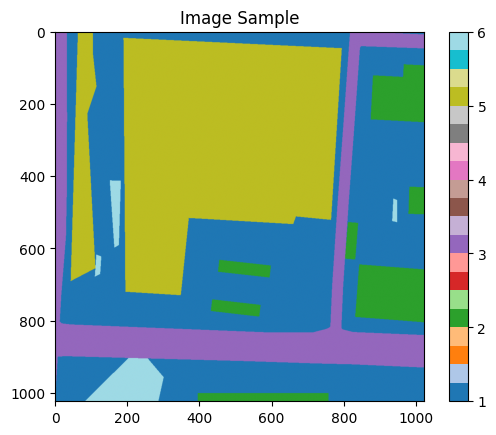

In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Maskeyi yükle
mask_img = Image.open(first_mask_path)
mask_np = np.array(mask_img)

# Resmi yükle
image_img = Image.open(first_img_path)
image_np = np.array(image_img)

# Benzersiz sınıf ID'lerini yazdır
print("Sınıf ID'leri:", np.unique(mask_np))


# Görsel olarak göster
plt.imshow(mask_np, cmap='tab20')
plt.title("Mask Sample")
plt.title("Image Sample")
plt.colorbar()
plt.show()


Maskedeki sınıf ID'leri: [1 2 3 5 6]


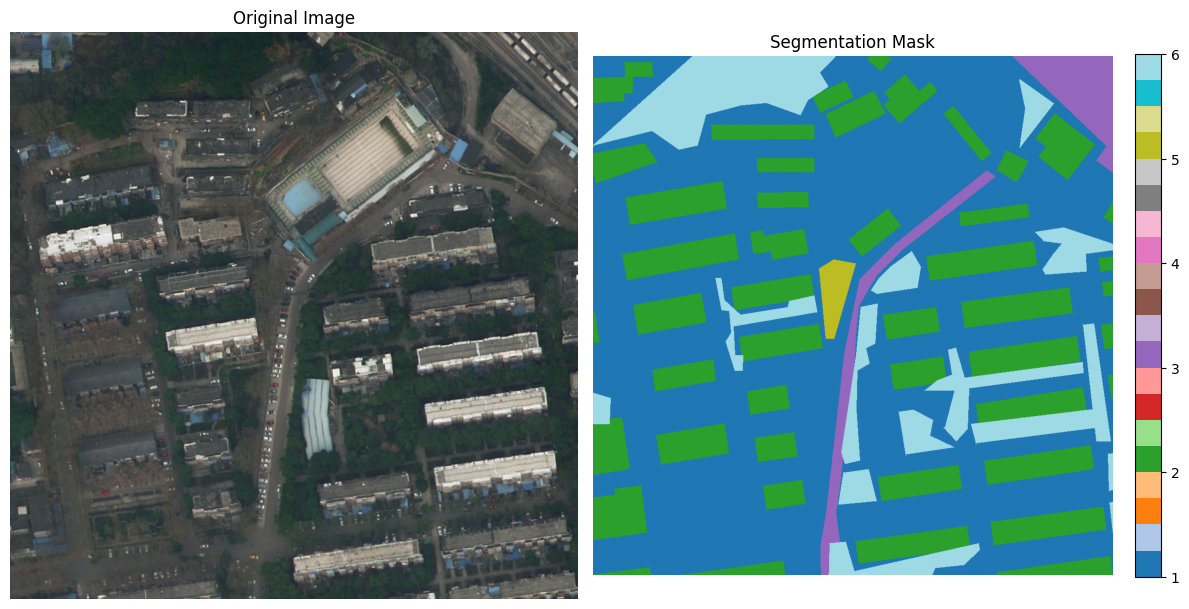

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Dosya yollarını ayarla
image_dir = '/content/loveda-dataset/Train/Train/Urban/images_png'
mask_dir = '/content/loveda-dataset/Train/Train/Urban/masks_png'

# İlk dosyayı seç
image_files = sorted(os.listdir(image_dir))
mask_files = sorted(os.listdir(mask_dir))

first_img_path = os.path.join(image_dir, image_files[2])
first_mask_path = os.path.join(mask_dir, mask_files[2])

# Görüntü ve maske yükle
image_img = Image.open(first_img_path).convert("RGB")
image_np = np.array(image_img)

mask_img = Image.open(first_mask_path)
mask_np = np.array(mask_img)

# Benzersiz sınıf ID'lerini yazdır
print("Maskedeki sınıf ID'leri:", np.unique(mask_np))

# Görsel olarak yan yana göster
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image_np)
axs[0].set_title("Original Image")
axs[0].axis('off')

im = axs[1].imshow(mask_np, cmap='tab20')
axs[1].set_title("Segmentation Mask")
axs[1].axis('off')

# Colorbar sadece maske için
fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()


In [8]:
import os

for root, dirs, files in os.walk(path):
    print(root)


NameError: name 'path' is not defined

8 batch size
3 Kanal sayısı (RGB için 3)
H Height
W Weight


In [9]:
images, masks = next(iter(train_loader))
print(images.shape)  # e.g., torch.Size([8, 3, H, W])
print(masks.shape)   # e.g., torch.Size([8, 1, H, W])


torch.Size([8, 3, 256, 256])
torch.Size([8, 256, 256])


In [10]:
class LoveDAClassNames:
    def __init__(self):
        self.classes = {
            0: "Background",
            1: "Building",
            2: "Road",
            3: "Water",
            4: "Barren",
            5: "Forest",
            6: "Agriculture",
        }

    def get_class_name(self, class_id):
        return self.classes.get(class_id, "Unknown")

    def print_all_classes(self):
        for class_id, class_name in self.classes.items():
            print(f"Class ID {class_id}: {class_name}")

# Kullanımı:
labels = LoveDAClassNames()
labels.print_all_classes()

print(labels.get_class_name(3))  # Output: Water


Class ID 0: Background
Class ID 1: Building
Class ID 2: Road
Class ID 3: Water
Class ID 4: Barren
Class ID 5: Forest
Class ID 6: Agriculture
Water


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
from PIL import Image
import os


In [12]:
print(torch.max(masks), torch.min(masks))
outputs = model(images)
print(outputs.shape)  # [B, 7, H, W] olmalı!
print(masks.dtype)  # torch.int64 olmalı
print(masks.min(), masks.max())  # Değerler 0 ile 6 arasında olmalı

masks = masks.long()
print(masks.dtype)  # torch.int64 olmalı


tensor(6) tensor(0)


NameError: name 'model' is not defined

In [13]:
# === UNET_MODEL_START ===

class DoubleConv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )
    def forward(self, x):
        return self.conv(x)

class UNet(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.dconv_down1 = DoubleConv(3, 64)
        self.dconv_down2 = DoubleConv(64, 128)
        self.dconv_down3 = DoubleConv(128, 256)
        self.dconv_down4 = DoubleConv(256, 512)

        self.maxpool = nn.MaxPool2d(2)
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)

        self.dconv_up3 = DoubleConv(256 + 512, 256)
        self.dconv_up2 = DoubleConv(128 + 256, 128)
        self.dconv_up1 = DoubleConv(128 + 64, 64)

        self.conv_last = nn.Conv2d(64, n_classes, 1)

    def forward(self, x):
        # Encoder
        conv1 = self.dconv_down1(x)
        x = self.maxpool(conv1)

        conv2 = self.dconv_down2(x)
        x = self.maxpool(conv2)

        conv3 = self.dconv_down3(x)
        x = self.maxpool(conv3)

        x = self.dconv_down4(x)

        # Decoder
        x = self.upsample(x)
        x = torch.cat([x, conv3], dim=1)
        x = self.dconv_up3(x)

        x = self.upsample(x)
        x = torch.cat([x, conv2], dim=1)
        x = self.dconv_up2(x)

        x = self.upsample(x)
        x = torch.cat([x, conv1], dim=1)
        x = self.dconv_up1(x)

        out = self.conv_last(x)
        return out
# === UNET_MODEL_END ===

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(n_classes=7)  # Corrected to 7 classes (0-6)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)  # outputs shape: [B, n_classes, H, W]

        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/10], Loss: 1.4285
Epoch [2/10], Loss: 1.2227
Epoch [3/10], Loss: 1.1077


In [ ]:
import os
# The path variable was printed in the output of cell T_LW-4fIE5yU
# If you have rerun cell T_LW-4fIE5yU, please update the path variable accordingly.
path = '/root/.cache/kagglehub/datasets/mohammedjaveed/loveda-dataset/versions/1'
print("Contents of the downloaded dataset directory:")
print(os.listdir(path))

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, jaccard_score
import numpy as np

def calculate_metrics(preds, targets, num_classes):
    preds = preds.cpu().numpy().flatten()
    targets = targets.cpu().numpy().flatten()

    # Precision, F1, Accuracy: macro average
    precision = precision_score(targets, preds, average='macro', zero_division=0)
    f1 = f1_score(targets, preds, average='macro', zero_division=0)
    acc = accuracy_score(targets, preds)
    iou = jaccard_score(targets, preds, average='macro', zero_division=0)

    return precision, f1, acc, iou


In [ ]:
num_classes = 7

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()
        outputs = model(images)  # UNet çıktısı: [B, C, H, W]

        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")


Epoch [1/10], Loss: 0.6411
Epoch [2/10], Loss: 0.6340
Epoch [3/10], Loss: 0.6091
Epoch [4/10], Loss: 0.5934
Epoch [5/10], Loss: 0.5647
Epoch [6/10], Loss: 0.5777
Epoch [7/10], Loss: 0.5376
Epoch [8/10], Loss: 0.5324
Epoch [9/10], Loss: 0.5028
Epoch [10/10], Loss: 0.4854


In [ ]:
# Eğitim sonrası model performansını değerlendirme
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        outputs = model(images)  # [B, C, H, W]
        preds = torch.argmax(outputs, dim=1)  # [B, H, W]

        all_preds.append(preds.cpu())
        all_targets.append(masks.cpu())

# Tüm batch'leri birleştir
all_preds = torch.cat(all_preds, dim=0)
all_targets = torch.cat(all_targets, dim=0)

# Metrikleri hesapla
precision, f1, acc, iou = calculate_metrics(all_preds, all_targets, num_classes)

print("\n=== Eğitim Sonu Genel Metrikler ===")
print(f"Accuracy :  {acc:.4f}")
print(f"F1 Score :  {f1:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"IoU      :  {iou:.4f}")



=== Eğitim Sonu Genel Metrikler ===
Accuracy :  0.8180
F1 Score :  0.8322
Precision:  0.8269
IoU      :  0.7215


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def visualize_prediction(model, dataloader, device):
    model.eval()
    with torch.no_grad():
        images, masks = next(iter(dataloader))
        images = images.to(device)
        masks = masks.to(device)

        outputs = model(images)  # [B, n_classes, H, W]
        preds = torch.argmax(outputs, dim=1)  # [B, H, W]

        # İlk örneği alalım
        img = images[2].cpu()
        mask = masks[2].cpu()
        pred = preds[2].cpu()

        # Görüntüyü normalize edilmiş halinden orijinale döndür (denormalize)
        mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
        img = img * std + mean
        img = img.clamp(0,1)

        # Maskeleri numpy array’e çevir
        mask = mask.numpy()
        pred = pred.numpy()

        # Renk paleti ve etiketler
        palette = {
            0: [255, 255, 255],     # Background - beyaz
            1: [128, 0, 0],         # Building - koyu kırmızı    Background
            2: [255, 255, 0],       # Road - sarı                Building olucak
            3: [0, 0, 128],         # Water - koyu mavi          Yol
            4: [128, 64, 128],      # Barren - morumsu
            5: [0, 128, 0],         # Forest - yeşil
            6: [189, 183, 107]      # Agriculture - bozkır rengi
        }

        labels = {
            0: "Background",
            1: "Building",
            2: "Road",
            3: "Water",
            4: "Barren",
            5: "Forest",
            6: "Agriculture"
        }

        # Renkli maske oluşturucu
        def label_to_color(mask):
            h, w = mask.shape
            color_mask = np.zeros((h, w, 3), dtype=np.uint8)
            for k, v in palette.items():
                color_mask[mask == k] = v
            return color_mask

        color_mask = label_to_color(mask)
        color_pred = label_to_color(pred)

        # Görselleri göster
                # Görselleri göster
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))

        axs[0].imshow(img.permute(1,2,0))
        axs[0].set_title("Original Image")
        axs[0].axis('off')

        axs[1].imshow(color_mask)
        axs[1].set_title("Ground Truth Mask")
        axs[1].axis('off')

        axs[2].imshow(color_pred)
        axs[2].set_title("Predicted Mask")
        axs[2].axis('off')

        # --- RENKLİ LEGEND BURADA EKLENİYOR ---
        from matplotlib.patches import Patch

        legend_elements = [
            Patch(facecolor=np.array(color)/255.0, label=label)
            for label, color in zip(labels.values(), palette.values())
        ]

        axs[2].legend(handles=legend_elements,
                      loc='lower right',
                      bbox_to_anchor=(1.5, 0),
                      title="Classes",
                      fontsize=10,
                      title_fontsize=12,
                      frameon=True)

        plt.tight_layout()
        plt.show()


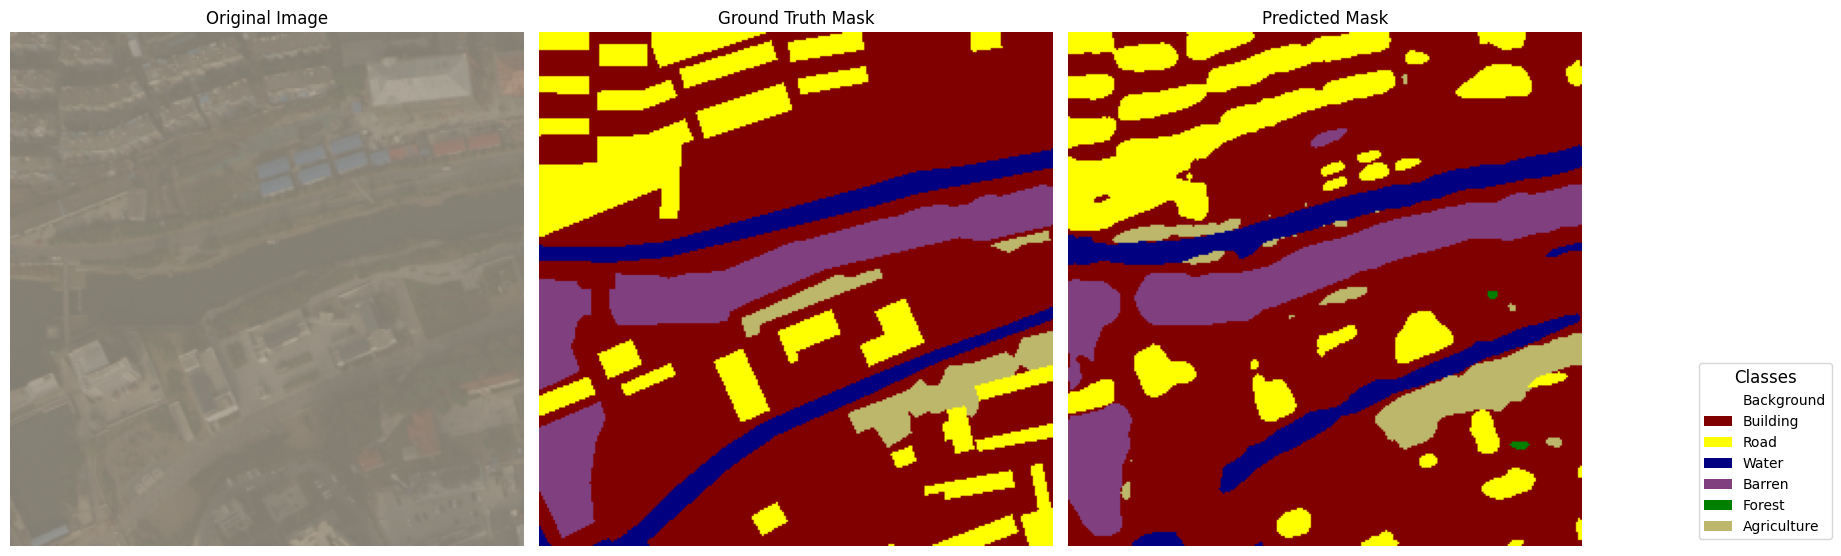

In [ ]:
visualize_prediction(model, train_loader, device)


FCN

In [ ]:
import torchvision.models.segmentation as models


In [ ]:
from torchvision.models.segmentation import fcn_resnet50

# Modeli yükle, pretrained=False (ImageNet değil)
fcn_model = fcn_resnet50(pretrained=False, num_classes=7)  # 7 sınıf
fcn_model = fcn_model.to(device)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 195MB/s]


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(fcn_model.parameters(), lr=1e-4)


In [ ]:
from torchvision.models.segmentation import fcn_resnet50

# FCN Modelini tanımla
model = fcn_resnet50(pretrained=False, num_classes=7)
model = model.to(device)

# Kayıp ve optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# Eğitim
num_classes = 7

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        optimizer.zero_grad()

        outputs = model(images)['out']  # FCN çıktısı dictionary: {'out': tensor}
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")


Epoch [1/10], Loss: 1.1624
Epoch [2/10], Loss: 0.8245
Epoch [3/10], Loss: 0.6933
Epoch [4/10], Loss: 0.6175
Epoch [5/10], Loss: 0.5395
Epoch [6/10], Loss: 0.4901
Epoch [7/10], Loss: 0.4366
Epoch [8/10], Loss: 0.4391
Epoch [9/10], Loss: 0.3941
Epoch [10/10], Loss: 0.3732


In [ ]:
# Değerlendirme (sadece eğitim sonunda)
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for images, masks in train_loader:
        images = images.to(device)
        masks = masks.to(device)

        outputs = model(images)['out']  # FCN çıktısı
        preds = torch.argmax(outputs, dim=1)

        all_preds.append(preds.cpu())
        all_targets.append(masks.cpu())

# Birleştir
all_preds = torch.cat(all_preds, dim=0)
all_targets = torch.cat(all_targets, dim=0)

# Metrikleri hesapla
precision, f1, acc, iou = calculate_metrics(all_preds, all_targets, num_classes)

print("\n=== Eğitim Sonu Genel Metrikler (FCN) ===")
print(f"Accuracy :  {acc:.4f}")
print(f"F1 Score :  {f1:.4f}")
print(f"Precision:  {precision:.4f}")
print(f"IoU      :  {iou:.4f}")



=== Eğitim Sonu Genel Metrikler (FCN) ===
Accuracy :  0.8720
F1 Score :  0.8825
Precision:  0.8804
IoU      :  0.7933


In [ ]:
def visualize_prediction(model, dataloader, device):
    model.eval()
    with torch.no_grad():
        images, masks = next(iter(dataloader))
        images = images.to(device)
        masks = masks.to(device)

        outputs = model(images)['out']  # FCN için yine ['out']
        preds = torch.argmax(outputs, dim=1)

         # İlk örneği alalım
        img = images[2].cpu()
        mask = masks[2].cpu()
        pred = preds[2].cpu()

        # Görüntüyü normalize edilmiş halinden orijinale döndür (denormalize)
        mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
        std = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
        img = img * std + mean
        img = img.clamp(0,1)

        # Maskeleri numpy array’e çevir
        mask = mask.numpy()
        pred = pred.numpy()

        # Renk paleti ve etiketler
        palette = {
            0: [255, 255, 255],     # Background - beyaz
            1: [128, 0, 0],         # Building - koyu kırmızı    Background
            2: [255, 255, 0],       # Road - sarı                Building olucak
            3: [0, 0, 128],         # Water - koyu mavi          Yol
            4: [128, 64, 128],      # Barren - morumsu
            5: [0, 128, 0],         # Forest - yeşil
            6: [189, 183, 107]      # Agriculture - bozkır rengi
        }

        labels = {
            0: "Background",
            1: "Building",
            2: "Road",
            3: "Water",
            4: "Barren",
            5: "Forest",
            6: "Agriculture"
        }

        # Renkli maske oluşturucu
        def label_to_color(mask):
            h, w = mask.shape
            color_mask = np.zeros((h, w, 3), dtype=np.uint8)
            for k, v in palette.items():
                color_mask[mask == k] = v
            return color_mask

        color_mask = label_to_color(mask)
        color_pred = label_to_color(pred)

        # Görselleri göster
                # Görselleri göster
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))

        axs[0].imshow(img.permute(1,2,0))
        axs[0].set_title("Original Image")
        axs[0].axis('off')

        axs[1].imshow(color_mask)
        axs[1].set_title("Ground Truth Mask")
        axs[1].axis('off')

        axs[2].imshow(color_pred)
        axs[2].set_title("Predicted Mask")
        axs[2].axis('off')

        # --- RENKLİ LEGEND BURADA EKLENİYOR ---
        from matplotlib.patches import Patch

        legend_elements = [
            Patch(facecolor=np.array(color)/255.0, label=label)
            for label, color in zip(labels.values(), palette.values())
        ]

        axs[2].legend(handles=legend_elements,
                      loc='lower right',
                      bbox_to_anchor=(1.5, 0),
                      title="Classes",
                      fontsize=10,
                      title_fontsize=12,
                      frameon=True)

        plt.tight_layout()
        plt.show()



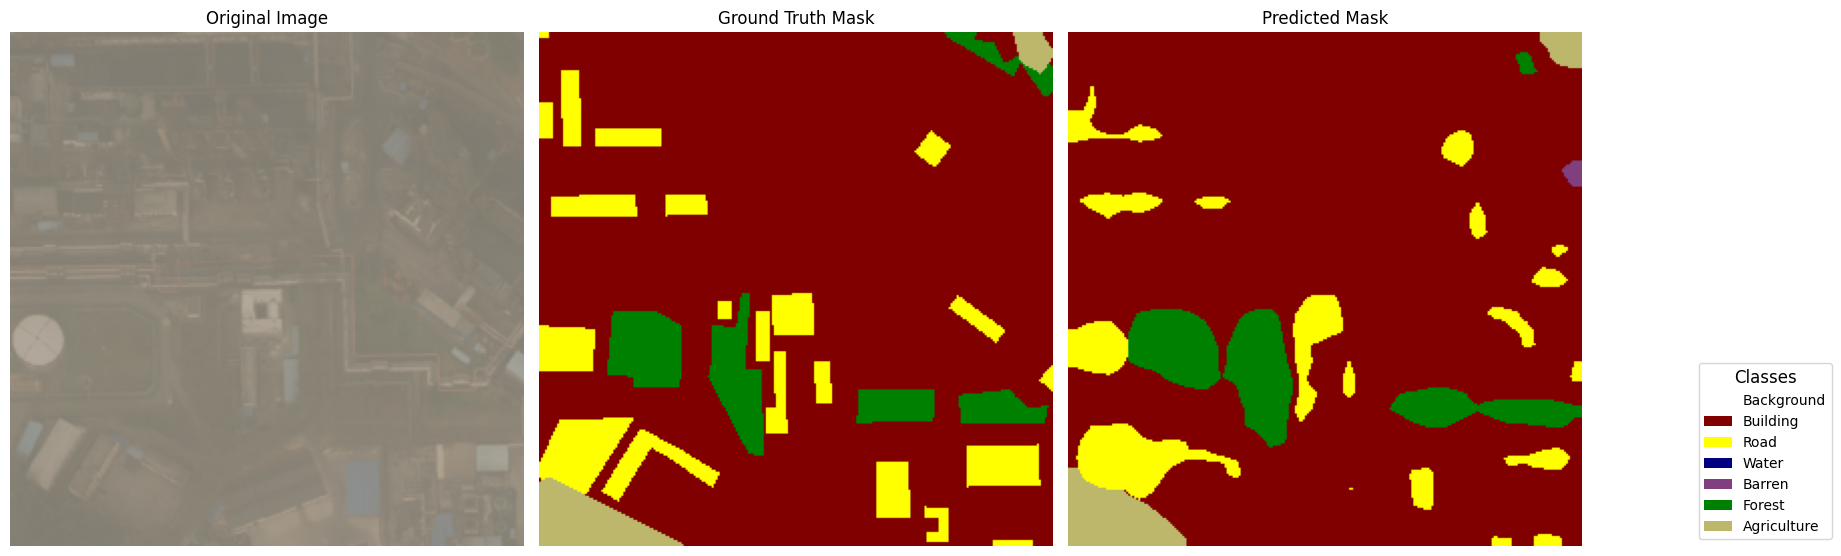

In [ ]:
visualize_prediction(model, train_loader, device)
